In [1]:
# 경고창 보이지 않기
import warnings
# warnings.filterwarnings('ignore')
# 그래프 크게보기
# plt.rcParams["figure.figsize"] = (15,6)

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [3]:
#1. feature 선택하기 
#('GrLiveArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 
# 'MasVnrArea', 'OverallQual', 'SaleCondition', 'BsmtQual', 'FireplaceQu', Fireplaces)

In [4]:
# 임시적으로 train, test 데이터 합치기 
y = df_train['SalePrice']
df_train.drop('SalePrice', axis=1, inplace=True);

In [5]:
df_all = pd.concat([df_train, df_test], axis=0)

In [6]:
df_all['TotalFlrSF'] = df_all['1stFlrSF'] + df_all['2ndFlrSF']

In [9]:
df_all_feature_selected = df_all[['GrLivArea', 'GarageArea', 'TotalFlrSF', 'TotRmsAbvGrd', 'TotalBsmtSF', \
                                  'MasVnrArea', 'OverallQual', 'SaleCondition', 'BsmtQual', 'FireplaceQu', 'Fireplaces']]

In [10]:
df_all_feature_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 11 columns):
GrLivArea        2919 non-null int64
GarageArea       2918 non-null float64
TotalFlrSF       2919 non-null int64
TotRmsAbvGrd     2919 non-null int64
TotalBsmtSF      2918 non-null float64
MasVnrArea       2896 non-null float64
OverallQual      2919 non-null int64
SaleCondition    2919 non-null object
BsmtQual         2838 non-null object
FireplaceQu      1499 non-null object
Fireplaces       2919 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 273.7+ KB


In [11]:
#2. 전처리 하기 (test 데이터 같이)
# 등급데이터 -> 숫자 

In [12]:
# Ex~Po의 등급을 가진 변수들은 모두 숫자로 바꿔줌. NA값은 무조건 0으로 만들어줌

cat_num_ls=['BsmtQual', 'FireplaceQu']

tonum = {"BsmtQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "FireplaceQu": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},         
        }

df_all_feature_selected = df_all_feature_selected.replace(tonum)

In [13]:
# dataframe 에서 nan 값을 가진 컬럼과 갖지 않은 컬럼 걸러내는 함수 
def nan_check(df_raw):
    # None 값이 있는 column만 가져옴.
    null_check = df_raw.isnull().sum()
    null_count = pd.DataFrame({'column' : null_check.index, 'NaN' : null_check.values})
    null_count = null_count.query('NaN > 0')
    return(null_count)

def nan_check2(df_raw):
    # None 값이 없는 column만 가져옴.
    null_check = df_raw.isnull().sum()
    null_count = pd.DataFrame({'column' : null_check.index, 'NaN' : null_check.values})
    null_count = null_count.query('NaN == 0')
    return(null_count)

In [14]:
nan_ls = list(set(nan_check(df_all_feature_selected)['column']) - set(nan_check2(df_all_feature_selected)['column']))
nan_ls

['TotalBsmtSF', 'MasVnrArea', 'GarageArea']

In [15]:
df_all_feature_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 11 columns):
GrLivArea        2919 non-null int64
GarageArea       2918 non-null float64
TotalFlrSF       2919 non-null int64
TotRmsAbvGrd     2919 non-null int64
TotalBsmtSF      2918 non-null float64
MasVnrArea       2896 non-null float64
OverallQual      2919 non-null int64
SaleCondition    2919 non-null object
BsmtQual         2919 non-null int64
FireplaceQu      2919 non-null int64
Fireplaces       2919 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 273.7+ KB


In [16]:
# 수치형 컬럼 nan 값 median 값으로 처리하기
df_all_feature_selected['GarageArea'] = \
df_all_feature_selected['GarageArea'].fillna(df_all_feature_selected.GarageArea.median())
df_all_feature_selected['TotalBsmtSF'] = \
df_all_feature_selected['TotalBsmtSF'].fillna(df_all_feature_selected.TotalBsmtSF.median())
df_all_feature_selected['MasVnrArea'] = \
df_all_feature_selected['MasVnrArea'].fillna(df_all_feature_selected.GarageArea.median())

In [17]:
df_all_feature_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 11 columns):
GrLivArea        2919 non-null int64
GarageArea       2919 non-null float64
TotalFlrSF       2919 non-null int64
TotRmsAbvGrd     2919 non-null int64
TotalBsmtSF      2919 non-null float64
MasVnrArea       2919 non-null float64
OverallQual      2919 non-null int64
SaleCondition    2919 non-null object
BsmtQual         2919 non-null int64
FireplaceQu      2919 non-null int64
Fireplaces       2919 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 273.7+ KB


In [16]:
#3. p-value 기준 class 삭제하기

In [17]:
# df_all_feature_selected, train 과 test 로 다시 나누기 

In [18]:
df_train2 = df_all_feature_selected.iloc[:1460, :]
df_test2 = df_all_feature_selected.iloc[1460:, :]

In [19]:
df_train2['SalePrice'] = y

C:\Users\ssoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_train2.columns

Index(['GrLivArea', 'GarageArea', 'TotalFlrSF', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'MasVnrArea', 'OverallQual', 'SaleCondition', 'BsmtQual', 'FireplaceQu',
       'Fireplaces', 'SalePrice'],
      dtype='object')

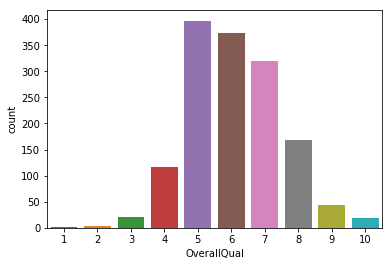

In [21]:
sns.countplot(x='OverallQual', data=df_train2)
plt.show()

In [32]:
# Anova 분석을 통한 변수 중요도 출력 
# 결과 : OverallQual > TotalFlrSF > GarageArea > TotalBsmtSF > BsmtQual > SaleCondition
#        MasVnrArea > Fireplaces > TotRmsAbvGrd> FireplaceQu
# 위의 순서로 변수중요도를 보이고 있다 (귀무가설을 강력하게 기각하고 있다) 
model_anova = sm.OLS.from_formula("SalePrice ~ Fireplaces + FireplaceQu + BsmtQual + \
SaleCondition + OverallQual + MasVnrArea + TotalBsmtSF + TotRmsAbvGrd + TotalFlrSF + \
GarageArea", data=df_train2)
result_anova = model_anova.fit()
sm.stats.anova_lm(result_anova, typ=2)

,sum_sq,df,F,PR(>F)
SaleCondition,6.244194e+10,5.0,8.924812,2.322317e-08
Fireplaces,8.003899e+09,1.0,5.719977,1.690017e-02
FireplaceQu,1.064621e+09,1.0,0.760830,3.832138e-01
BsmtQual,4.556082e+10,1.0,32.559989,1.399918e-08
OverallQual,3.665774e+11,1.0,261.974142,2.804329e-54
MasVnrArea,3.660068e+10,1.0,26.156631,3.570155e-07
TotalBsmtSF,5.811323e+10,1.0,41.530550,1.577158e-10
TotRmsAbvGrd,7.384159e+07,1.0,0.052771,8.183427e-01
TotalFlrSF,1.597671e+11,1.0,114.177382,1.055290e-25
GarageArea,9.270716e+10,1.0,66.253067,8.473764e-16


In [58]:
# FireplaceQU 와 Fireplaces 의 상관관계 (0.863241)
# TotalFlrSF 와 TotRmsAbvGrd 의 상관관계 (0.820088)
# 다소 높아 보이는 상관관계쌍을 anova분석상 중요도가 높은 변수만 남기고 삭제
df_train2.corr()

,GrLivArea,GarageArea,TotalFlrSF,TotRmsAbvGrd,TotalBsmtSF,MasVnrArea,OverallQual,BsmtQual,FireplaceQu,Fireplaces,SalePrice
GrLivArea,1.000000,0.468997,0.995718,0.825489,0.454868,0.390709,0.593007,0.327956,0.469947,0.461679,0.708624
GarageArea,0.468997,1.000000,0.479189,0.337822,0.486665,0.373073,0.562022,0.406109,0.327973,0.269141,0.623431
TotalFlrSF,0.995718,0.479189,1.000000,0.820088,0.461738,0.400441,0.600758,0.335876,0.476054,0.467488,0.716883
TotRmsAbvGrd,0.825489,0.337822,0.820088,1.000000,0.285573,0.277513,0.427452,0.185846,0.355589,0.326114,0.533723
TotalBsmtSF,0.454868,0.486665,0.461738,0.285573,1.000000,0.365628,0.537808,0.564299,0.347615,0.339519,0.613581
MasVnrArea,0.390709,0.373073,0.400441,0.277513,0.365628,1.000000,0.414861,0.282906,0.271395,0.247422,0.477611
OverallQual,0.593007,0.562022,0.600758,0.427452,0.537808,0.414861,1.000000,0.629379,0.490788,0.396765,0.790982
BsmtQual,0.327956,0.406109,0.335876,0.185846,0.564299,0.282906,0.629379,1.000000,0.307337,0.229635,0.585207
FireplaceQu,0.469947,0.327973,0.476054,0.355589,0.347615,0.271395,0.490788,0.307337,1.000000,0.863241,0.520438
Fireplaces,0.461679,0.269141,0.467488,0.326114,0.339519,0.247422,0.396765,0.229635,0.863241,1.000000,0.466929


In [68]:
# Anova 분석을 통한 변수 중요도 출력 
# 결과 : OverallQual > TotalFlrSF > GarageArea > TotalBsmtSF > BsmtQual > SaleCondition
#        MasVnrArea > Fireplaces > TotRmsAbvGrd> FireplaceQu
model = sm.OLS.from_formula("np.log1p(SalePrice) ~ C(OverallQual) + scale(TotalFlrSF) + \
scale(GarageArea) + scale(TotalBsmtSF) + C(BsmtQual) + C(SaleCondition) + scale(MasVnrArea) + \
C(Fireplaces)", data=df_train2)
# 'GrLivArea'(X), 'GarageArea', 'TotalFlrSF', 'TotRmsAbvGrd', 'TotalBsmtSF',
# 'MasVnrArea', 'OverallQual', 'SaleCondition', 'BsmtQual', 'FireplaceQu',
# 'Fireplaces', 'SalePrice'
result = model.fit()
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log1p(SalePrice)   R-squared:                       0.828
Model:                             OLS   Adj. R-squared:                  0.825
Method:                  Least Squares   F-statistic:                     276.1
Date:                 Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                         08:26:44   Log-Likelihood:                 553.61
No. Observations:                 1460   AIC:                            -1055.
Df Residuals:                     1434   BIC:                            -917.8
Df Model:                           25                                         
Covariance Type:             nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercep